# Steps to conducting a complete Data Science and Machine Learning projects

## 1. Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\Zaki Hamdard\AppData\Local\Temp\ipykernel_14772\3055506017.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Loading the Dataset

In [2]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 3. Getting to know the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##### Since the 'name' column contributes the least to 'mpg' or target variable, we will just remove it.

In [4]:
df.drop(["name"], axis = 1, inplace = True)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 4. Data Preprocessing

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


### Filling The Missing Values with the avarage of the column value

In [9]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [11]:
df.isnull().sum().any()

False

In [12]:
df.shape

(398, 8)

##### Alright! we can see that our data is clean, and we do not have any missing values anymore.

## 5. Exploratory Data Analysis (EDA)

### a. Unit Variable (Univariate) Analysis

In [13]:
df["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [14]:
df.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

##### Now let's do Variate Analysis using valualizations. Note: variables with few number of observations can be plotted using countplot()

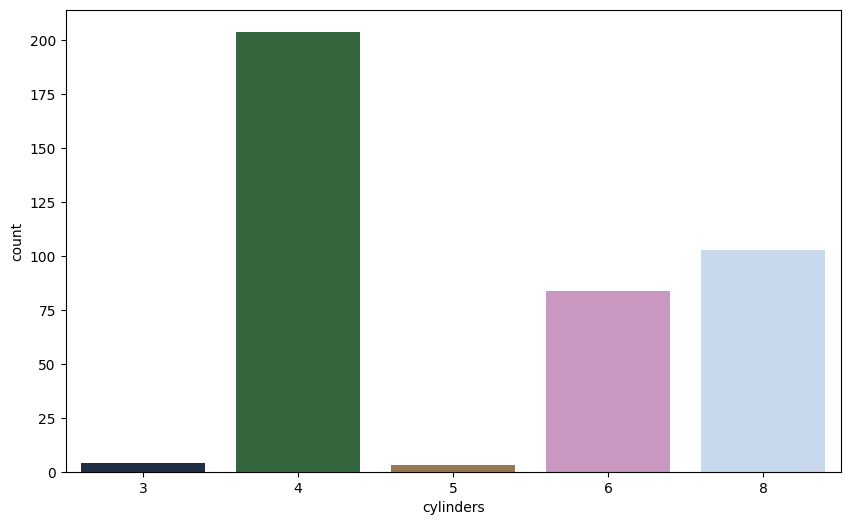

In [15]:
plt.figure(figsize = (10, 6))

sns.countplot(data = df, x = "cylinders", palette = "cubehelix")
plt.show()

In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [17]:

df.model_year = df.model_year + 1900
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


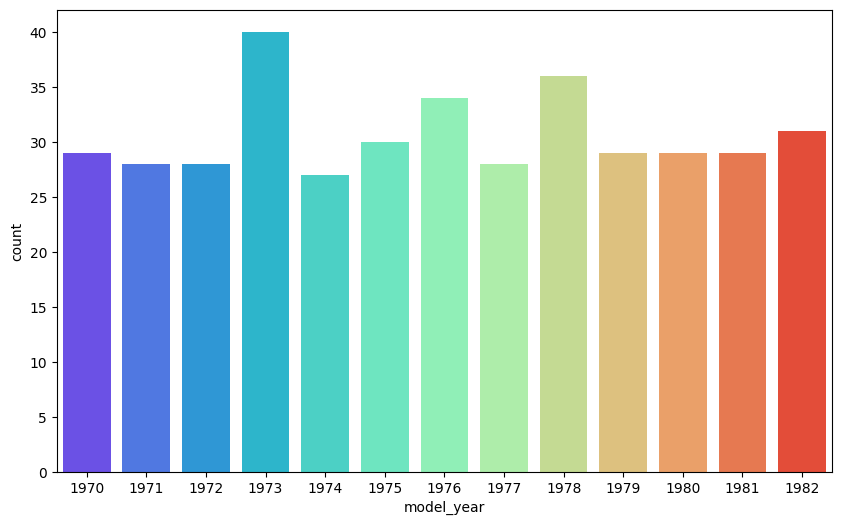

In [18]:
plt.figure(figsize = (10, 6))

sns.countplot(data = df, x = "model_year", palette = "rainbow")
plt.show()

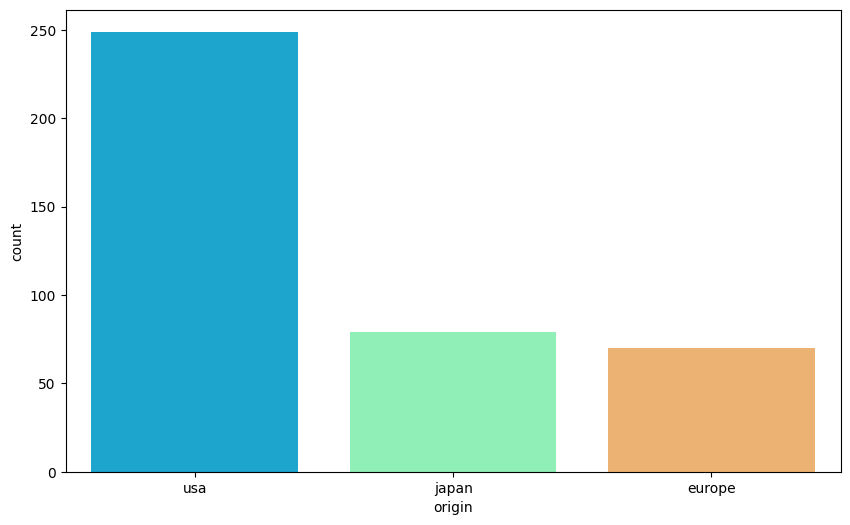

In [19]:
plt.figure(figsize = (10, 6))

sns.countplot(data = df, x = "origin", palette = "rainbow")
plt.show()

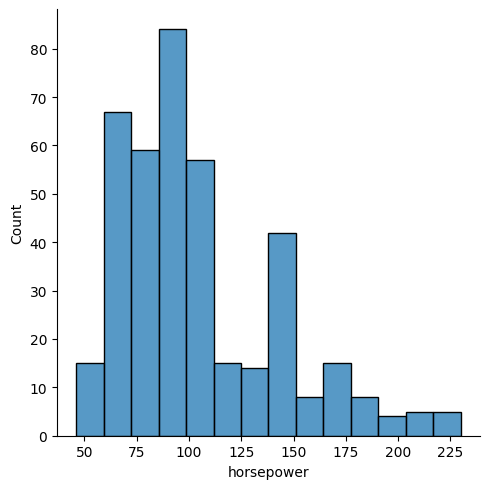

In [20]:
sns.displot(df.horsepower)
plt.show()

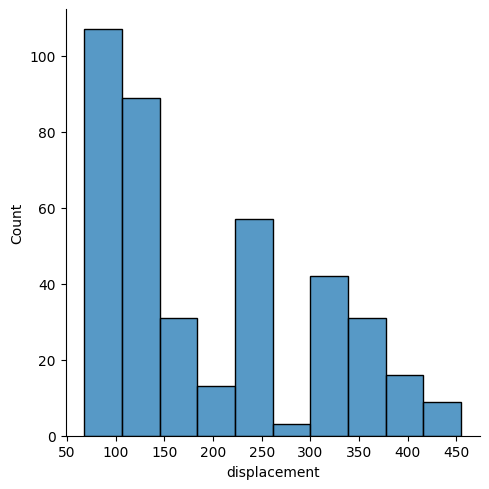

In [21]:
sns.displot(df["displacement"])
plt.show()

### b. Binary Variable (Bivariate) Analysis

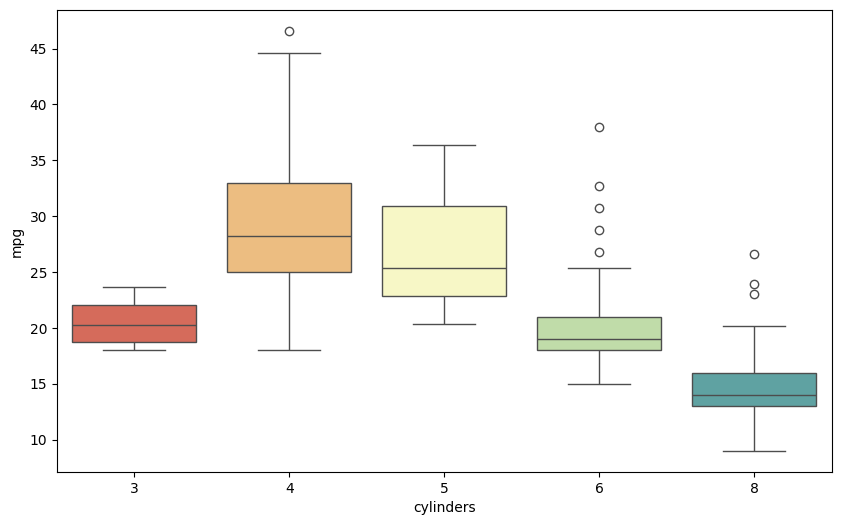

In [22]:
plt.figure(figsize = (10, 6))

sns.boxplot(x = "cylinders", y = "mpg", data = df, palette = "Spectral")
plt.show()

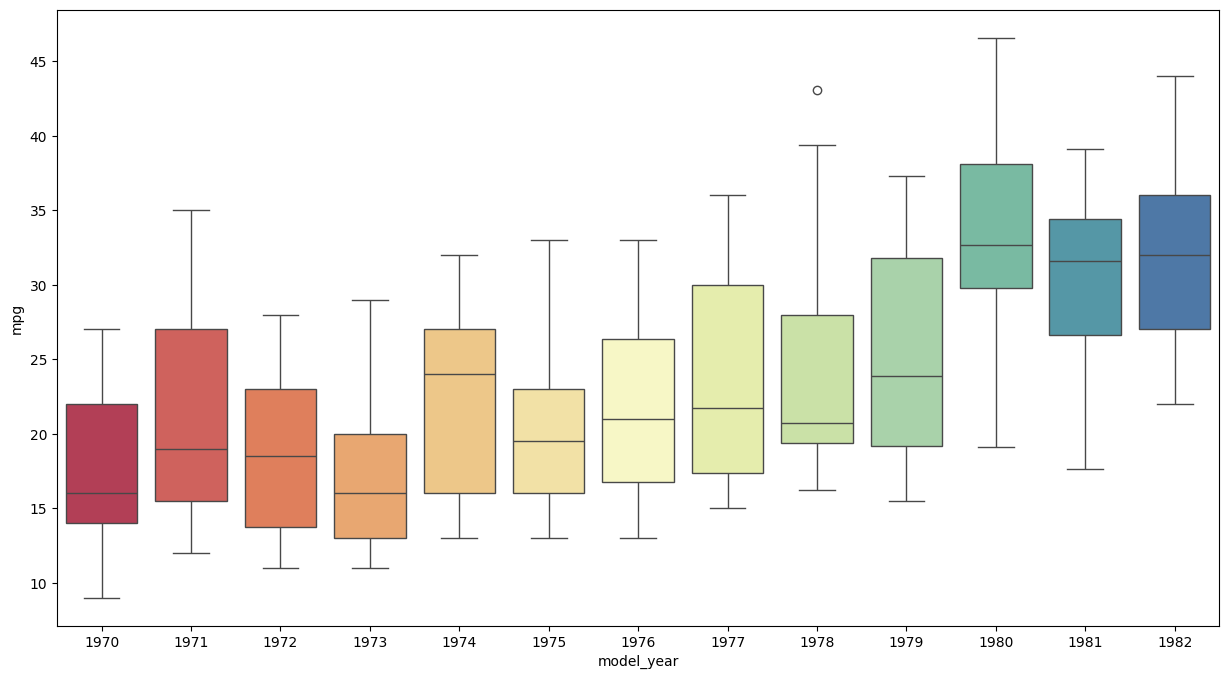

In [23]:
plt.figure(figsize = (15, 8))

sns.boxplot(x = "model_year", y = "mpg", data = df, palette = "Spectral")
plt.show()

### c. Multi variable (Multivariate) analysis

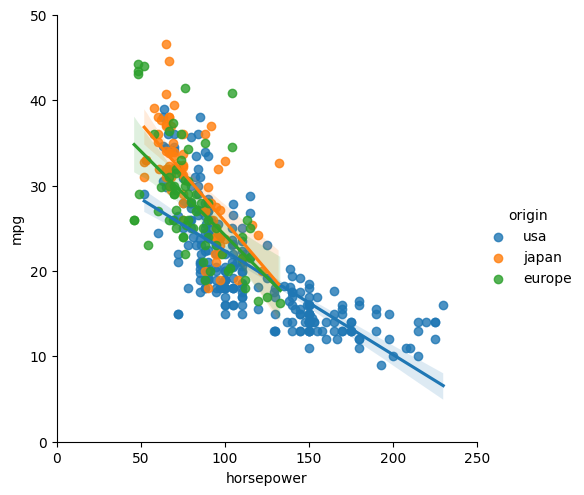

In [24]:
graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df)
graph.set(xlim = (0, 250))
graph.set(ylim = (0, 50))

plt.show()

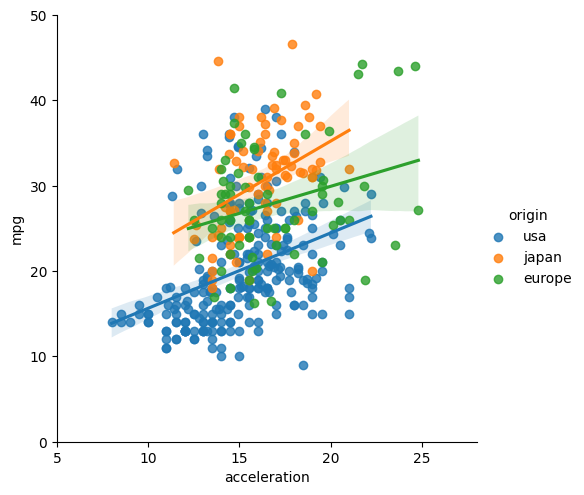

In [25]:
graph = sns.lmplot(x = "acceleration", y = "mpg", hue = "origin", data = df)
graph.set(xlim = (5, 28))
graph.set(ylim = (0, 50))

plt.show()

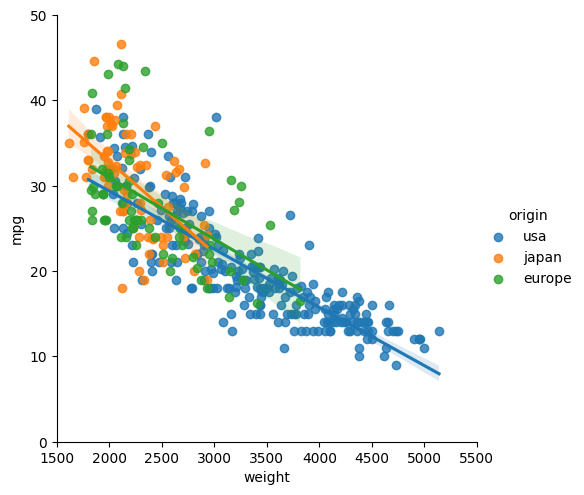

In [26]:
graph = sns.lmplot(x = "weight", y = "mpg", hue = "origin", data = df)
graph.set(xlim = (1500, 5500))
graph.set(ylim = (0, 50))

plt.show()

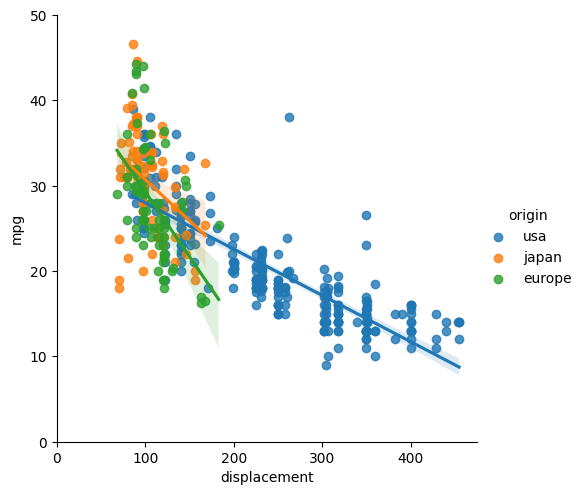

In [27]:
graph = sns.lmplot(x = "displacement", y = "mpg", hue = "origin", data = df)
graph.set(xlim = (0, 475))
graph.set(ylim = (0, 50))

plt.show()

### c. Heatmap of the Correlation Matrix

In [29]:
new_df = df.copy()
new_df.drop(["origin"], axis = 1, inplace = True)

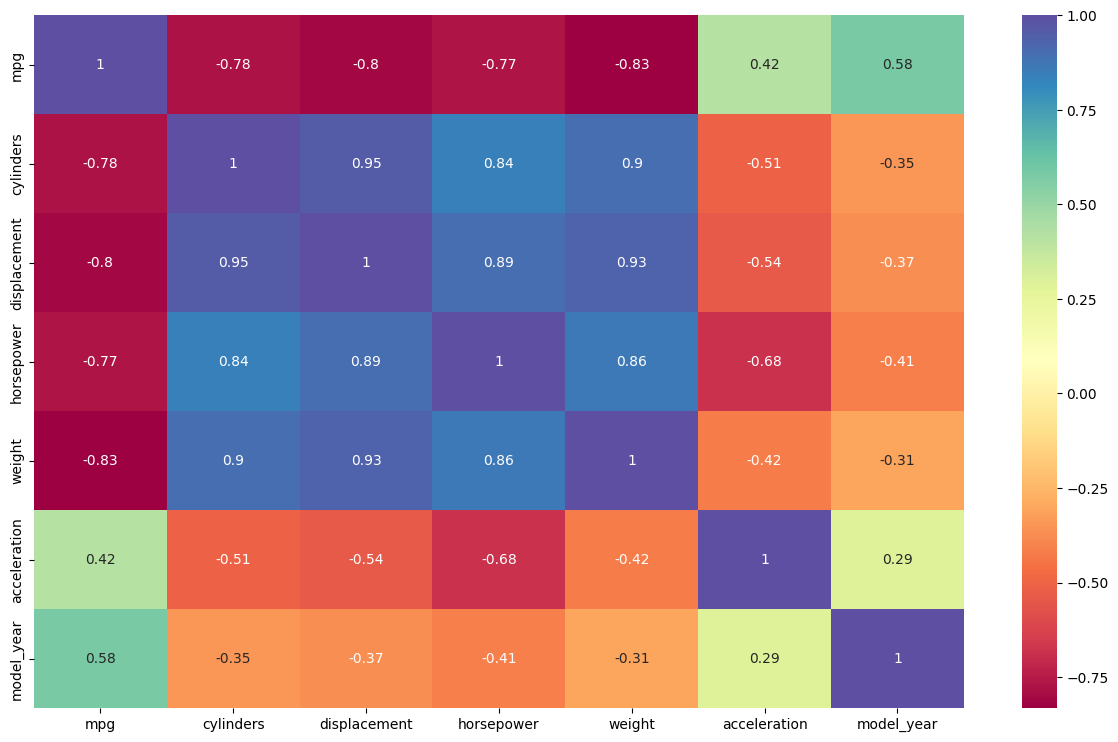

In [31]:
plt.figure(figsize = (15, 9))

sns.heatmap(new_df.corr(), annot = True, cmap = "Spectral")
plt.show()

In [32]:
df.drop(["acceleration", "displacement"], axis = 1, inplace = True)
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


### d. Feature Engineering

In [41]:
from datetime import datetime

today = datetime.today()

this_year = today.year

df["age"] = (this_year - df["model_year"])
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin,age
0,18.0,8,130.0,3504,1970,usa,54
1,15.0,8,165.0,3693,1970,usa,54
2,18.0,8,150.0,3436,1970,usa,54
3,16.0,8,150.0,3433,1970,usa,54
4,17.0,8,140.0,3449,1970,usa,54


In [42]:
df.drop(["model_year"], axis = 1, inplace = True)
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [43]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [46]:
df = pd.get_dummies(df, drop_first = True).astype(int)

df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18,8,130,3504,54,0,1
1,15,8,165,3693,54,0,1
2,18,8,150,3436,54,0,1
3,16,8,150,3433,54,0,1
4,17,8,140,3449,54,0,1


# 6. Modelling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.drop(["mpg"], axis = 1)
y = df["mpg"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

# 7. Model Evaluation

In [49]:
y_preds = model.predict(x_test)

my_dict = {"Actual": y_test, "Prediction": y_preds}

compare = pd.DataFrame(my_dict)

compare.sample(10)

,Actual,Prediction
375,36,35.415519
351,34,31.927468
55,27,27.989106
181,33,31.148061
222,17,17.294051
73,13,13.019884
234,24,24.318698
46,22,21.913097
104,12,8.424716
208,13,16.887861


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    r2 = r2_score(actual, pred)

    print(f"MAE: {MAE} \nMSE: {MSE} \nRMSE: {RMSE} \nr2_score: {r2}")


eval_metrics(y_test, y_preds)

MAE: 2.3305622827563184 
MSE: 8.873445981213788 
RMSE: 2.978832989815607 
r2_score: 0.8330838333962272


###### 
Mean Absolute Error (MAE):

Your value: 2.3306
What it means: This number shows how far, on average, your model’s guesses are from the actual numbers. Imagine you guess the distance of several cities from your home, and on average, you are 2.3306 kilometers wrong in your guesses.

Mean Squared Error (MSE):

Your value: 8.8734
What it means: This is another way of seeing how much your guesses are wrong. Here, big mistakes count a lot more than smaller ones because we square the error (multiply the mistake by itself). It's like saying if you are wrong by a lot, it’s much worse than being wrong by a little.

Root Mean Squared Error (RMSE):

Your value: 2.9788
What it means: This is similar to MAE but gives more penalty to big mistakes. It’s like MSE but adjusted back to the normal scale (like taking the square root makes it more understandable). If you’re explaining this in terms of the city distance example, it means on average, your guess can be off by about 2.9788 kilometers.

R-squared (Coefficient of Determination):

Your value: 0.8331 (or 83.31%)
What it means: This tells you how much of the changes in your data can be explained by your model. For example, if R-squared is 83.31%, it means that your model explains 83.31% of the differences in miles per gallon that the cars achieve, based on your model. It’s a way of saying how good your model is at predicting. The closer this number is to 100%, the better your model is.